In [459]:
#importing datasets and analysing it
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


dataset=pd.read_csv('datasets_glass.csv')
print(dataset.describe())

               RI          Na          Mg  ...          Ba          Fe        Type
count  214.000000  214.000000  214.000000  ...  214.000000  214.000000  214.000000
mean     1.518365   13.407850    2.684533  ...    0.175047    0.057009    2.780374
std      0.003037    0.816604    1.442408  ...    0.497219    0.097439    2.103739
min      1.511150   10.730000    0.000000  ...    0.000000    0.000000    1.000000
25%      1.516523   12.907500    2.115000  ...    0.000000    0.000000    1.000000
50%      1.517680   13.300000    3.480000  ...    0.000000    0.000000    2.000000
75%      1.519157   13.825000    3.600000  ...    0.000000    0.100000    3.000000
max      1.533930   17.380000    4.490000  ...    3.150000    0.510000    7.000000

[8 rows x 10 columns]


In [460]:
dataset

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [461]:
#checking for missing values
print(dataset.isnull().mean())

RI      0.0
Na      0.0
Mg      0.0
Al      0.0
Si      0.0
K       0.0
Ca      0.0
Ba      0.0
Fe      0.0
Type    0.0
dtype: float64


In [462]:
#Analysing the target variable
print('Target Variable')
print(dataset.groupby(['Type']).Type.count())

Target Variable
Type
1    70
2    76
3    17
5    13
6     9
7    29
Name: Type, dtype: int64


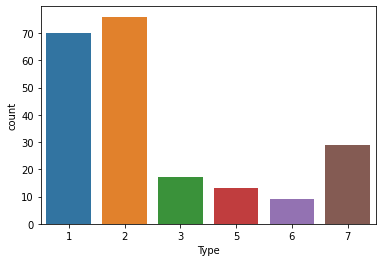

In [463]:
#countplot for the same
ax = sns.countplot(x="Type", data=dataset)

In [464]:
features=list(dataset.columns)
features=features[:-1:]
target=("1","2","3","5","6","7")


In [465]:
#doing train-test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(dataset.iloc[:,:-1], 
                                                    dataset.iloc[:,-1], 
                                                    test_size = 0.25,
                                                    random_state = 42)

In [466]:
#creating the Decision Tree
from sklearn.tree import DecisionTreeClassifier
classifier_dt=DecisionTreeClassifier(criterion='gini', random_state=0,max_depth=5,
                                   max_features=7,max_leaf_nodes=7,min_samples_leaf=4)

classifier_dt.fit(x_train,y_train)
y_pred_dt=classifier_dt.predict(x_test)

In [467]:
#checking accuracy
from sklearn.metrics import accuracy_score
print("TEST SET ACCURACY =",accuracy_score(y_test, y_pred_dt),'\n')


from sklearn.metrics import classification_report, confusion_matrix
print("CLASSIFICATION REPORT ")
print(classification_report(y_test,y_pred_dt),"\n")
print("CONFUSION MATRIX")
print(confusion_matrix(y_test,y_pred_dt))

TEST SET ACCURACY = 0.7222222222222222 

CLASSIFICATION REPORT 
              precision    recall  f1-score   support

           1       0.67      0.86      0.75        14
           2       0.75      0.71      0.73        21
           3       0.00      0.00      0.00         4
           5       0.50      1.00      0.67         4
           6       0.00      0.00      0.00         3
           7       1.00      1.00      1.00         8

    accuracy                           0.72        54
   macro avg       0.49      0.60      0.52        54
weighted avg       0.65      0.72      0.68        54
 

CONFUSION MATRIX
[[12  2  0  0  0  0]
 [ 4 15  0  2  0  0]
 [ 2  2  0  0  0  0]
 [ 0  0  0  4  0  0]
 [ 0  1  0  2  0  0]
 [ 0  0  0  0  0  8]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [468]:
#Function for visualising Trees
from sklearn import tree
from IPython.display import Image 
from io import StringIO
import pydotplus
def plot_decision_tree(clf,feature_name,target_name):
    dot_data = StringIO()  
    tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=feature_name,  
                         class_names=target_name,  
                         filled=True, rounded=True,  
                         special_characters=True)  
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    return Image(graph.create_png())

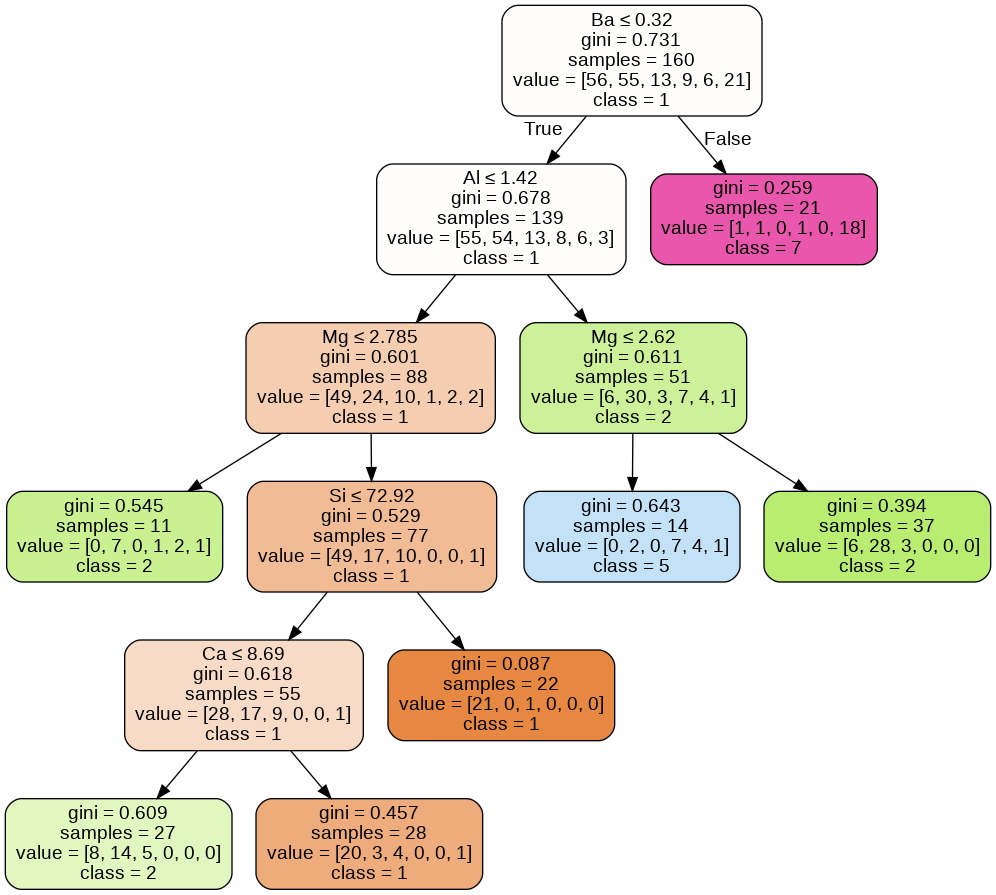

In [469]:
#visualising DTree
plot_decision_tree(classifier_dt,features,target)

In [470]:
#creating Random Forest
from sklearn.ensemble import RandomForestClassifier
classifier_rf=RandomForestClassifier(criterion='entropy',bootstrap=True,random_state=0,n_estimators=37,verbose = 1)
classifier_rf.fit(x_train,y_train)
y_pred_rf=classifier_rf.predict(x_test)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  37 out of  37 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  37 out of  37 | elapsed:    0.0s finished


In [471]:
#checking accuracy
from sklearn.metrics import accuracy_score
print("TEST SET ACCURACY =",accuracy_score(y_test, y_pred_rf),'\n')


from sklearn.metrics import classification_report, confusion_matrix
print("CLASSIFICATION REPORT ")
print(classification_report(y_test,y_pred_rf),"\n")
print("CONFUSION MATRIX")
print(confusion_matrix(y_test,y_pred_rf))

TEST SET ACCURACY = 0.8148148148148148 

CLASSIFICATION REPORT 
              precision    recall  f1-score   support

           1       0.70      1.00      0.82        14
           2       0.93      0.62      0.74        21
           3       1.00      0.75      0.86         4
           5       0.75      0.75      0.75         4
           6       0.75      1.00      0.86         3
           7       0.89      1.00      0.94         8

    accuracy                           0.81        54
   macro avg       0.84      0.85      0.83        54
weighted avg       0.85      0.81      0.81        54
 

CONFUSION MATRIX
[[14  0  0  0  0  0]
 [ 5 13  0  1  1  1]
 [ 1  0  3  0  0  0]
 [ 0  1  0  3  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0  8]]


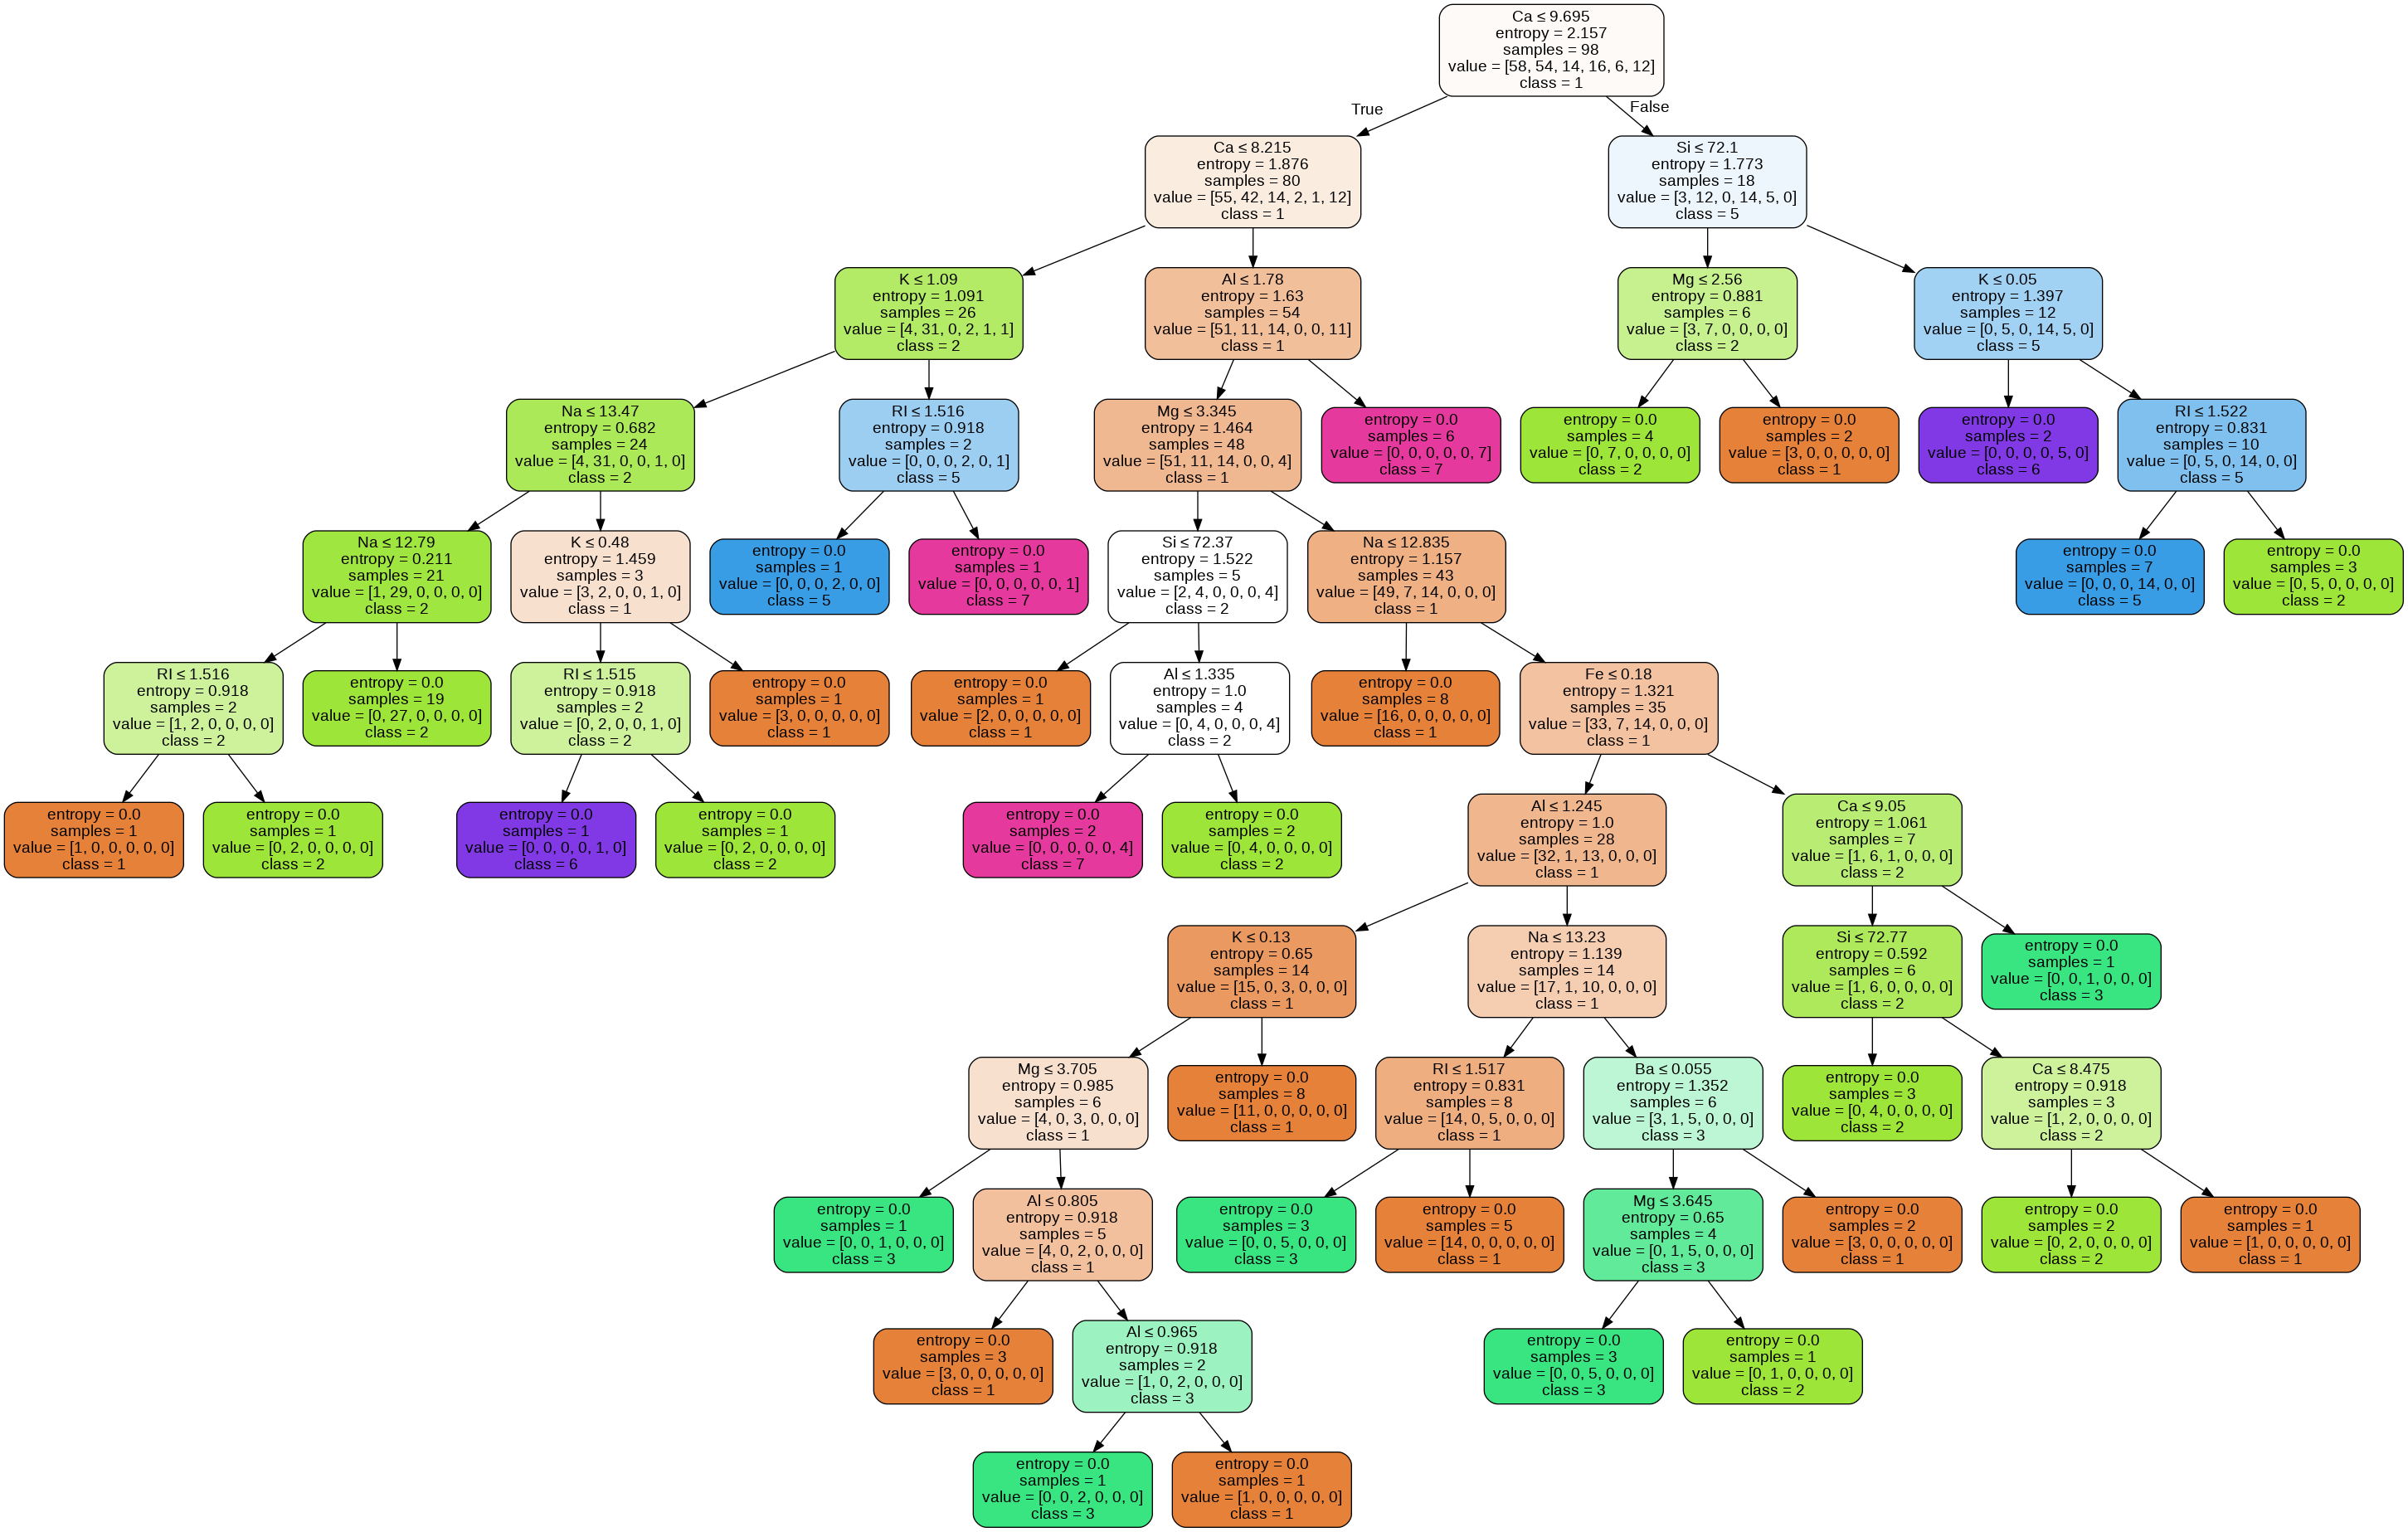

In [472]:
#Visualising a Decision Tree in the RandomForest
plot_decision_tree(classifier_rf.estimators_[10],features,target)

In [473]:
#creating XGBoost Classifier
from xgboost import XGBClassifier

params = {'learning_rate': 0.0001, 
          'n_estimators': 3500, 
          'verbosity': 1,
          'objective': 'multi:softmax',
          'num_class':6 ,
          'max_depth': 2, 
          'min_child_weight': 2 ,
          'max_delta_step': 2, 
          'subsample': 1 , 
          'colsample_bytree' : 0.8,
          'scale_pos_weight' : 1,
          'gamma' : 0.01,
          'learning_rate': 0.1,} #parameters obtained from comprehensive grid search

classifier_xgb=XGBClassifier()
classifier_xgb.set_params(**params)

classifier_xgb.fit(x_train,y_train)
y_pred_xgb=classifier_xgb.predict(x_test)


In [474]:
#checking accuracy
from sklearn.metrics import accuracy_score
print("TEST SET ACCURACY =",accuracy_score(y_test, y_pred_xgb),'\n')


from sklearn.metrics import classification_report, confusion_matrix
print("CLASSIFICATION REPORT ")
print(classification_report(y_test,y_pred_xgb),"\n")
print("CONFUSION MATRIX")
print(confusion_matrix(y_test,y_pred_xgb))

TEST SET ACCURACY = 0.8333333333333334 

CLASSIFICATION REPORT 
              precision    recall  f1-score   support

           1       0.74      1.00      0.85        14
           2       0.89      0.76      0.82        21
           3       1.00      0.50      0.67         4
           5       1.00      0.50      0.67         4
           6       0.75      1.00      0.86         3
           7       0.89      1.00      0.94         8

    accuracy                           0.83        54
   macro avg       0.88      0.79      0.80        54
weighted avg       0.86      0.83      0.82        54
 

CONFUSION MATRIX
[[14  0  0  0  0  0]
 [ 3 16  0  0  1  1]
 [ 2  0  2  0  0  0]
 [ 0  2  0  2  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0  8]]


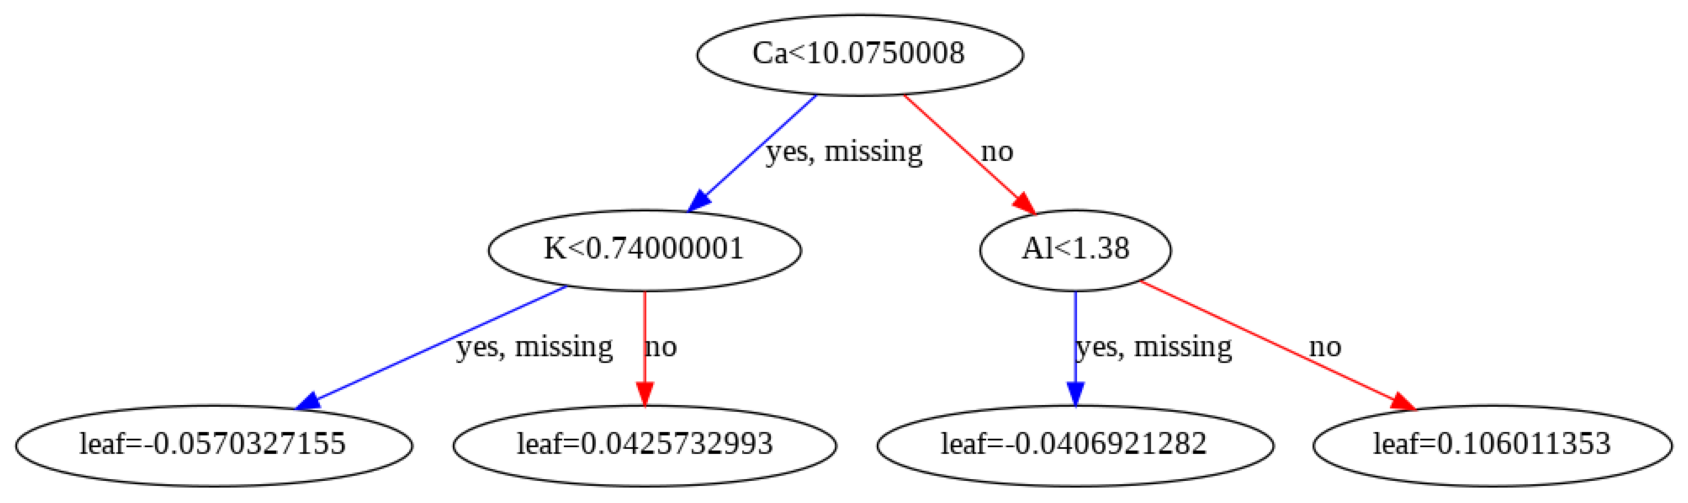

In [475]:
#visualizing a decision tree from XGBoostModel
from xgboost import plot_tree
plot_tree(classifier_xgb, num_trees=15)
fig = plt.gcf()
fig.set_size_inches(30, 15)

In [476]:
#creating a Artificial Neural Network

#feature scaling the data for Neural Networks
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)



In [477]:
#creating Multi-Layer Perceptron
from sklearn.neural_network import MLPClassifier
classifier_nn = MLPClassifier(max_iter=100,
                              activation = 'relu',
                              alpha= 0.0001,
                              hidden_layer_sizes = (50, 100, 50),
                              learning_rate = 'adaptive',
                              solver = 'adam') #parameters aquired after comprehensive grid search

classifier_nn.fit(x_train,y_train)
y_pred_nn=classifier_nn.predict(x_test)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [478]:
#checking accuracy
from sklearn.metrics import accuracy_score
print("TEST SET ACCURACY =",accuracy_score(y_test, y_pred_nn),'\n')


from sklearn.metrics import classification_report, confusion_matrix
print("CLASSIFICATION REPORT ")
print(classification_report(y_test,y_pred_nn),"\n")
print("CONFUSION MATRIX")
print(confusion_matrix(y_test,y_pred_nn))

TEST SET ACCURACY = 0.7777777777777778 

CLASSIFICATION REPORT 
              precision    recall  f1-score   support

           1       0.65      0.93      0.76        14
           2       0.79      0.71      0.75        21
           3       0.00      0.00      0.00         4
           5       1.00      0.75      0.86         4
           6       0.75      1.00      0.86         3
           7       1.00      1.00      1.00         8

    accuracy                           0.78        54
   macro avg       0.70      0.73      0.70        54
weighted avg       0.74      0.78      0.75        54
 

CONFUSION MATRIX
[[13  1  0  0  0  0]
 [ 5 15  0  0  1  0]
 [ 2  2  0  0  0  0]
 [ 0  1  0  3  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0  8]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
